<a href="https://colab.research.google.com/github/shivani983/computer-vision-handson/blob/main/bone_fracture_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
!nvidia_smi

/bin/bash: line 1: nvidia_smi: command not found


In [2]:
# cloning yolo v5
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 17410, done.
remote: Counting objects: 100% (84/84), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 17410 (delta 63), reused 22 (delta 22), pack-reused 17326 (from 3)
Receiving objects: 100% (17410/17410), 16.29 MiB | 13.83 MiB/s, done.
Resolving deltas: 100% (11928/11928), done.


In [24]:
import os
os.chdir("/content/yolov5")

In [25]:
%ls

benchmarks.py    data.yaml   models/          requirements.txt  utils/
CITATION.cff     detect.py   __pycache__/     runs/             val.py
classify/        export.py   pyproject.toml   segment/          yolov5s.pt
CONTRIBUTING.md  hubconf.py  README.md        train.py
data/            LICENSE     README.zh-CN.md  tutorial.ipynb


In [5]:
# installing requirements
!pip install -r requirements.txt
import torch

from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 89.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.8/978.8 kB 52.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [41]:
%pwd

'/content'

In [35]:
%cd ..

/


In [37]:
os.chdir("/content/")

In [44]:
!unzip /content/drive/MyDrive/computervision/BoneFractureYolo8.zip

Archive:  /content/drive/MyDrive/computervision/BoneFractureYolo8.zip
   creating: BoneFractureYolo8/
   creating: BoneFractureYolo8/test/
   creating: BoneFractureYolo8/test/images/
  inflating: BoneFractureYolo8/test/images/105_jpg.rf.3cde2fcd15a9bdf6a2d2d32aff48f33d.jpg  
  inflating: BoneFractureYolo8/test/images/10_jpg.rf.d362a00f9a6b4ac31668dc8aae9c71de.jpg  
  inflating: BoneFractureYolo8/test/images/117_jpg.rf.119dccd2483b04d8d3a8c33a1393d362.jpg  
  inflating: BoneFractureYolo8/test/images/118_jpg.rf.acee2a86eba65adc57f3b15d5acab93c.jpg  
  inflating: BoneFractureYolo8/test/images/11_jpg.rf.8e1c22ba2779121f3ba0a8ae03a20407.jpg  
  inflating: BoneFractureYolo8/test/images/124_jpg.rf.100aeaede7a9c017d7f74f73cfcf34d7.jpg  
  inflating: BoneFractureYolo8/test/images/124_jpg.rf.dab4a5f6292af8332da8f9bad9751ba6.jpg  
  inflating: BoneFractureYolo8/test/images/12_jpg.rf.3e4b2f52016c100e9f869397933ef2d3.jpg  
  inflating: BoneFractureYolo8/test/images/131_jpg.rf.1a70e4c9e91ea953aa5598

In [45]:
%cat /content/yolov5/models/yolov5s.yaml

# Ultralytics 🚀 AGPL-3.0 License - https://ultralytics.com/license

# Parameters
nc: 80 # number of classes
depth_multiple: 0.33 # model depth multiple
width_multiple: 0.50 # layer channel multiple
anchors:
  - [10, 13, 16, 30, 33, 23] # P3/8
  - [30, 61, 62, 45, 59, 119] # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [
    [-1, 1, Conv, [64, 6, 2, 2]], # 0-P1/2
    [-1, 1, Conv, [128, 3, 2]], # 1-P2/4
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]], # 3-P3/8
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]], # 5-P4/16
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]], # 7-P5/32
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]], # 9
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]], # cat backbone P4
    [-1, 3, C3, [512, False]], # 13

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, 

In [46]:
# customizing iPython writefile so we can write variables
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))



In [47]:
num_classes = 4

yaml_content = f"""
# Parameters

nc: {num_classes}  # number of classes
depth_multiple: 0.33
width_multiple: 0.50
anchors:
  - [10, 13, 16, 30, 33, 23]    # P3/8
  - [30, 61, 62, 45, 59, 119]   # P4/16
  - [116, 90, 156, 198, 373, 326] # P5/32

# YOLOv5 v6.0 backbone
backbone:
  [
    [-1, 1, Conv, [64, 6, 2, 2]],
    [-1, 1, Conv, [128, 3, 2]],
    [-1, 3, C3, [128]],
    [-1, 1, Conv, [256, 3, 2]],
    [-1, 6, C3, [256]],
    [-1, 1, Conv, [512, 3, 2]],
    [-1, 9, C3, [512]],
    [-1, 1, Conv, [1024, 3, 2]],
    [-1, 3, C3, [1024]],
    [-1, 1, SPPF, [1024, 5]],
  ]

# YOLOv5 v6.0 head
head: [
    [-1, 1, Conv, [512, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 6], 1, Concat, [1]],
    [-1, 3, C3, [512, False]],

    [-1, 1, Conv, [256, 1, 1]],
    [-1, 1, nn.Upsample, [None, 2, "nearest"]],
    [[-1, 4], 1, Concat, [1]],
    [-1, 3, C3, [256, False]],

    [-1, 1, Conv, [256, 3, 2]],
    [[-1, 14], 1, Concat, [1]],
    [-1, 3, C3, [512, False]],

    [-1, 1, Conv, [512, 3, 2]],
    [[-1, 10], 1, Concat, [1]],
    [-1, 3, C3, [1024, False]],

    [[17, 20, 23], 1, Detect, [{num_classes}, anchors]],  # Correct variable usage here
]
"""

with open("/content/yolov5/models/custom_yolov5s.yaml", "w") as f:
    f.write(yaml_content)


In [48]:
%pwd


'/content'

In [49]:
!mv BoneFractureYolo8 yolov5/


In [50]:
!echo "train: /content/yolov5/BoneFractureYolo8/train/images" > /content/yolov5/data.yaml
!echo "val: /content/yolov5/BoneFractureYolo8/valid/images" >> /content/yolov5/data.yaml
!echo "nc: 4" >> /content/yolov5/data.yaml
!echo "names: ['angle', 'fracture', 'line', 'messed_up_angle']" >> /content/yolov5/data.yaml


In [51]:
%pwd

'/content'

In [19]:
cd ..

/content


In [53]:
# training yolov5

%%time
%cd /content/yolov5/
!python train.py --img 416 --batch 16 --epochs 30 --data '/content/yolov5/data.yaml' --cfg ./models/custom_yolov5s.yaml --weights 'yolov5s.pt' --name yolov5s_results --cache

/content/yolov5
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-04-20 18:57:12.313398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745175432.335161   14567 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745175432.341863   14567 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second tim

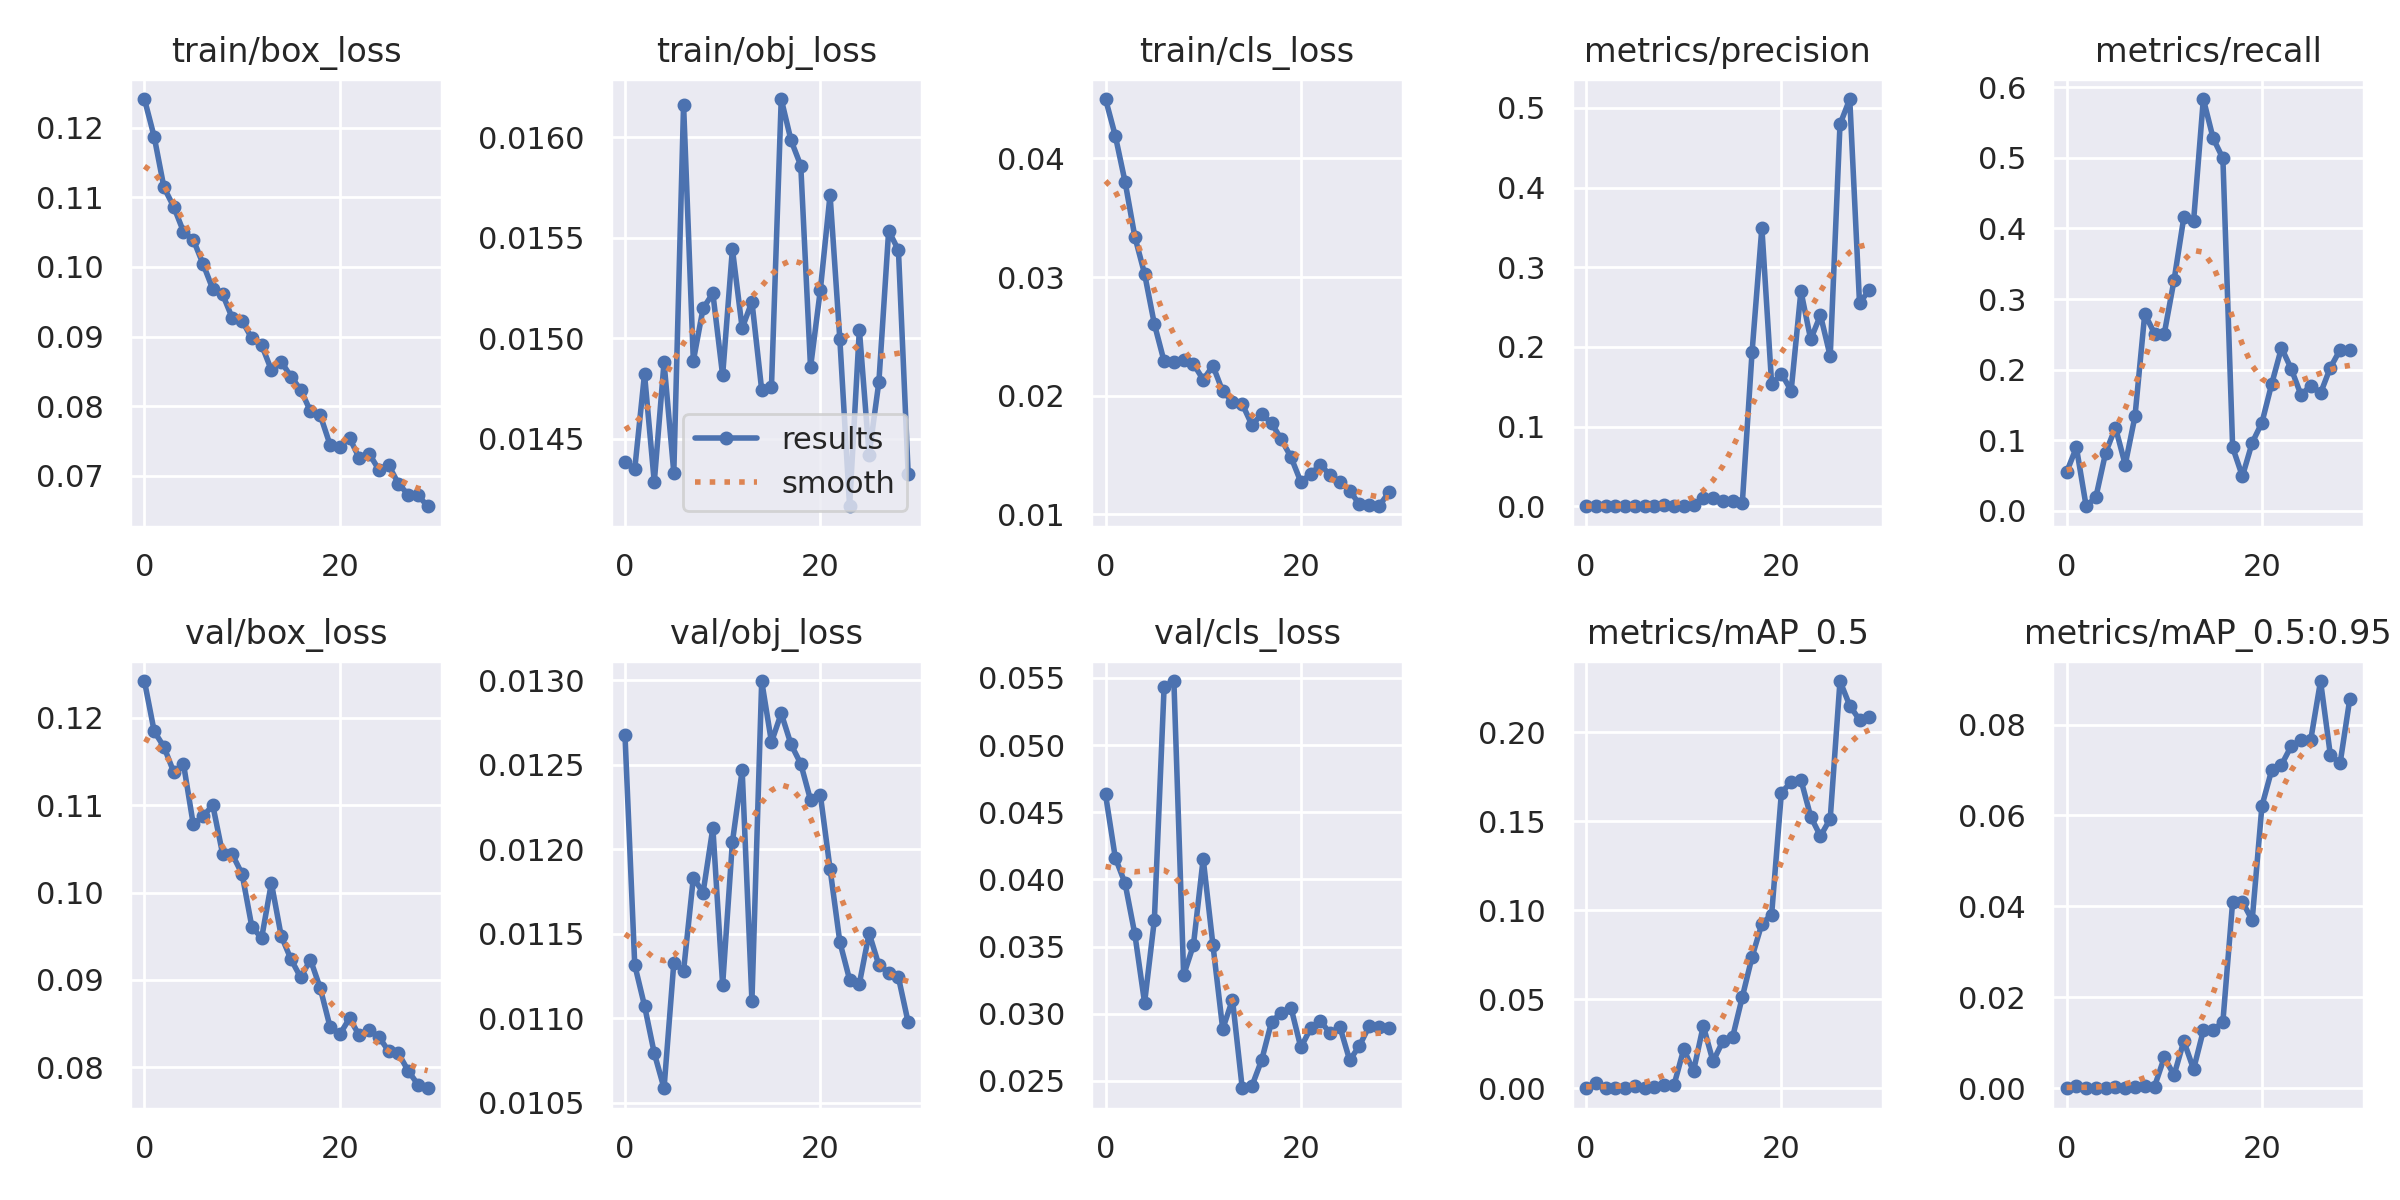

In [54]:
# evaluating the model
import utils
from utils.plots import plot_results  # plot results.txt as results.png
Image(filename='/content/yolov5/runs/train/yolov5s_results4/results.png')

augmented trainig data


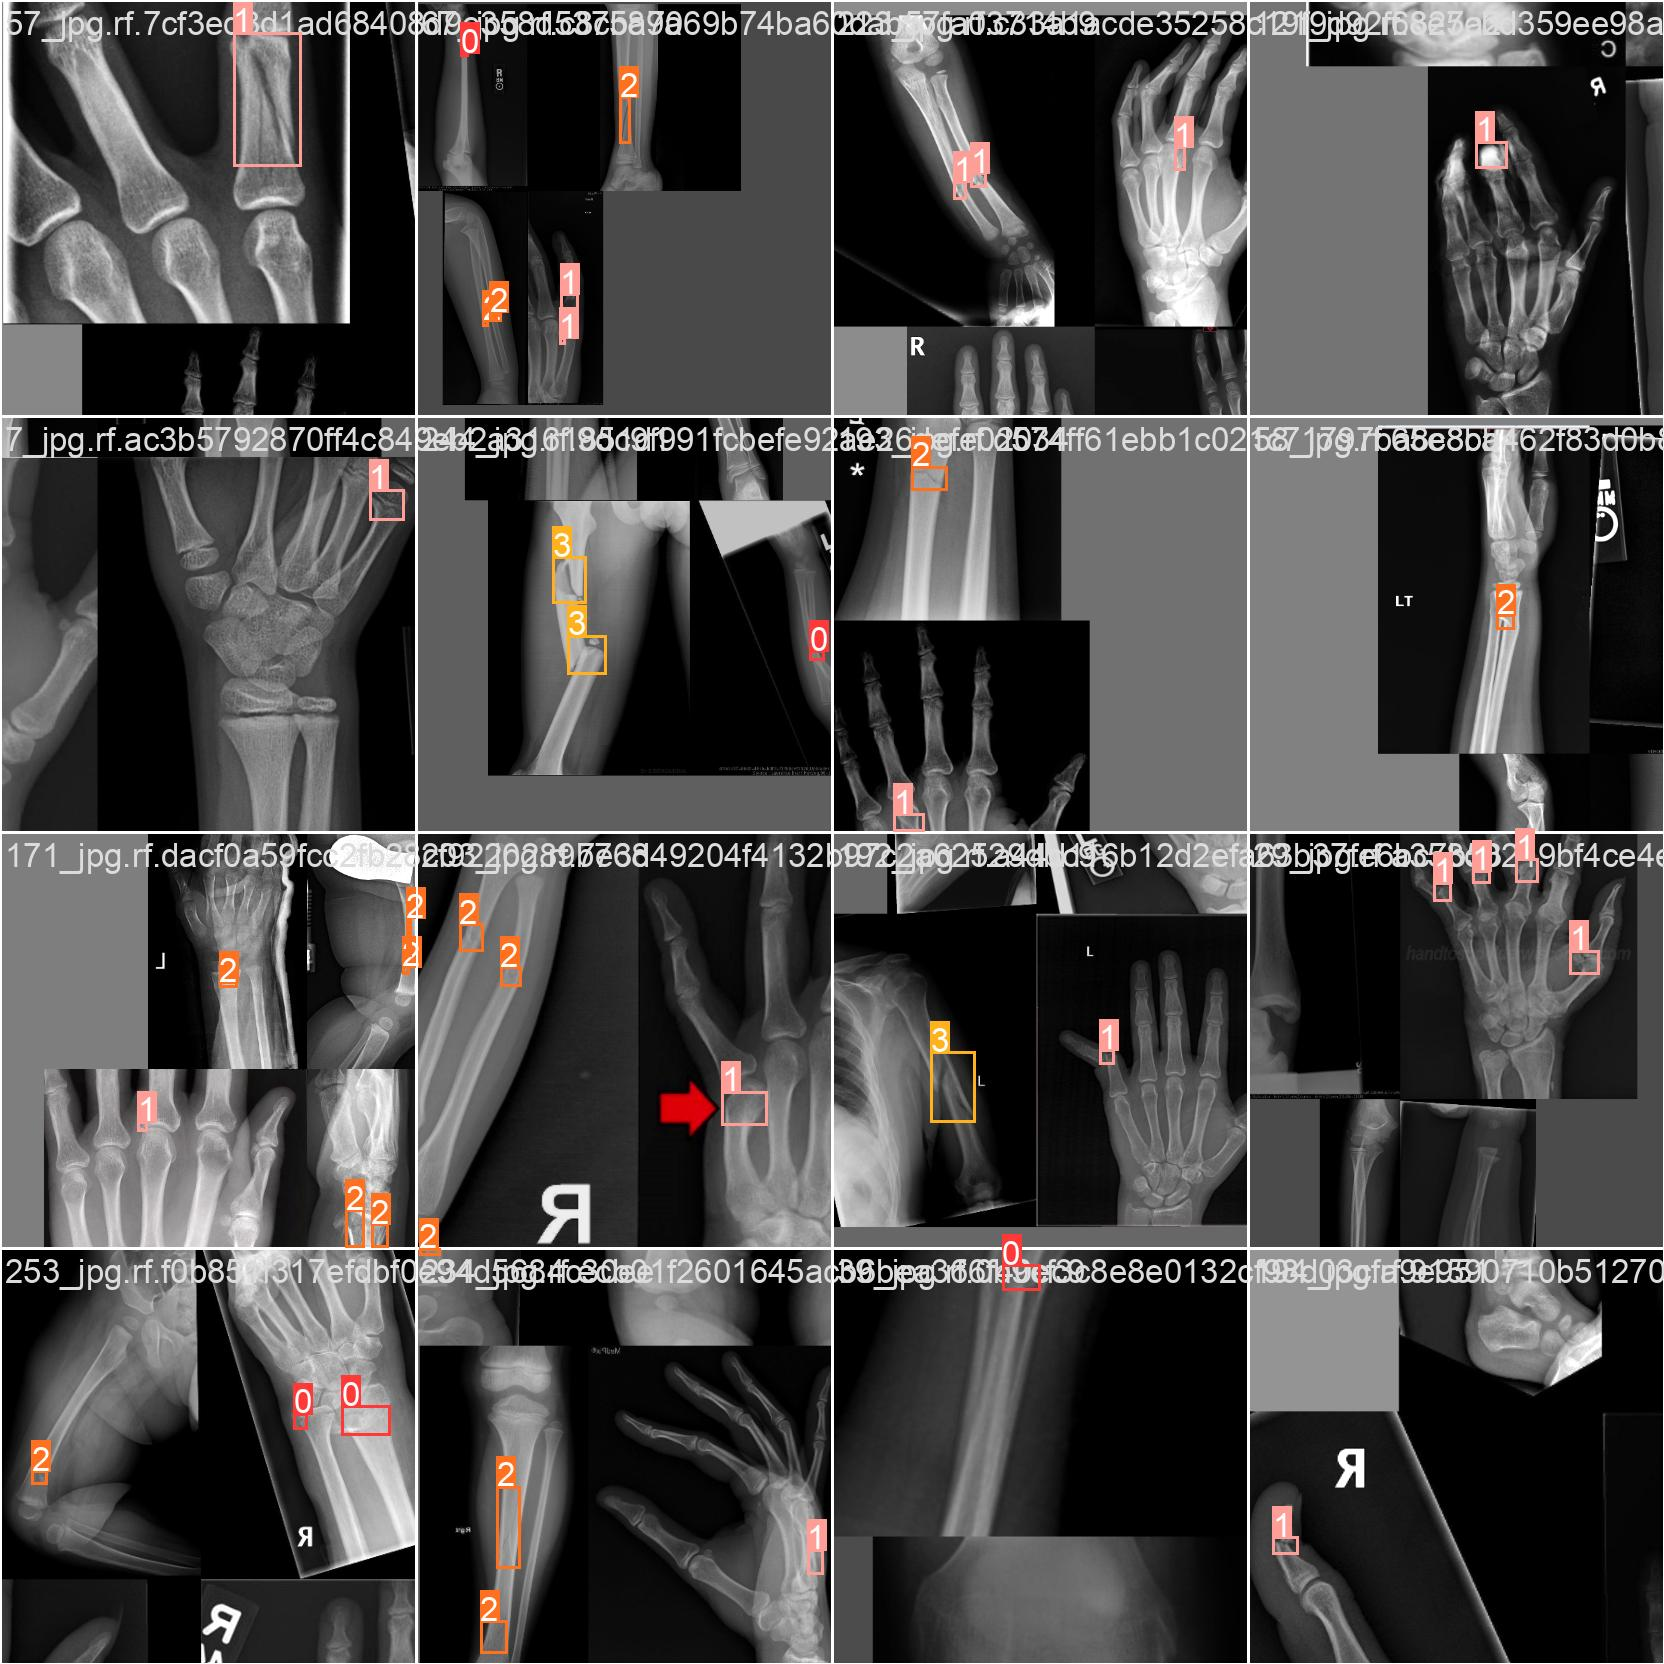

In [55]:
#printing images
print("augmented trainig data")
Image(filename = '/content/yolov5/runs/train/yolov5s_results4/train_batch0.jpg', width=1000)